==> Loaded Data_20190106_02_001
... zeroes [0] in self.Data --> replacing with ones [1] before log10.
==> Converted to dB (20*log10).
==> Clipped in range: bins 0--4000
==> Loaded Data_20190106_02_002
... zeroes [0] in self.Data --> replacing with ones [1] before log10.
==> Converted to dB (20*log10).
==> Clipped in range: bins 0--4000
==> Loaded Data_20190106_02_003
... zeroes [0] in self.Data --> replacing with ones [1] before log10.
==> Converted to dB (20*log10).
==> Clipped in range: bins 0--4000
==> Loaded Data_20190106_02_004
... zeroes [0] in self.Data --> replacing with ones [1] before log10.
==> Converted to dB (20*log10).
==> Clipped in range: bins 0--4000
==> Loaded Data_20190106_02_005
... zeroes [0] in self.Data --> replacing with ones [1] before log10.
==> Converted to dB (20*log10).
==> Clipped in range: bins 0--4000
==> Loaded Data_20190106_02_006
... zeroes [0] in self.Data --> replacing with ones [1] before log10.
==> Converted to dB (20*log10).
==> Clipped in range:

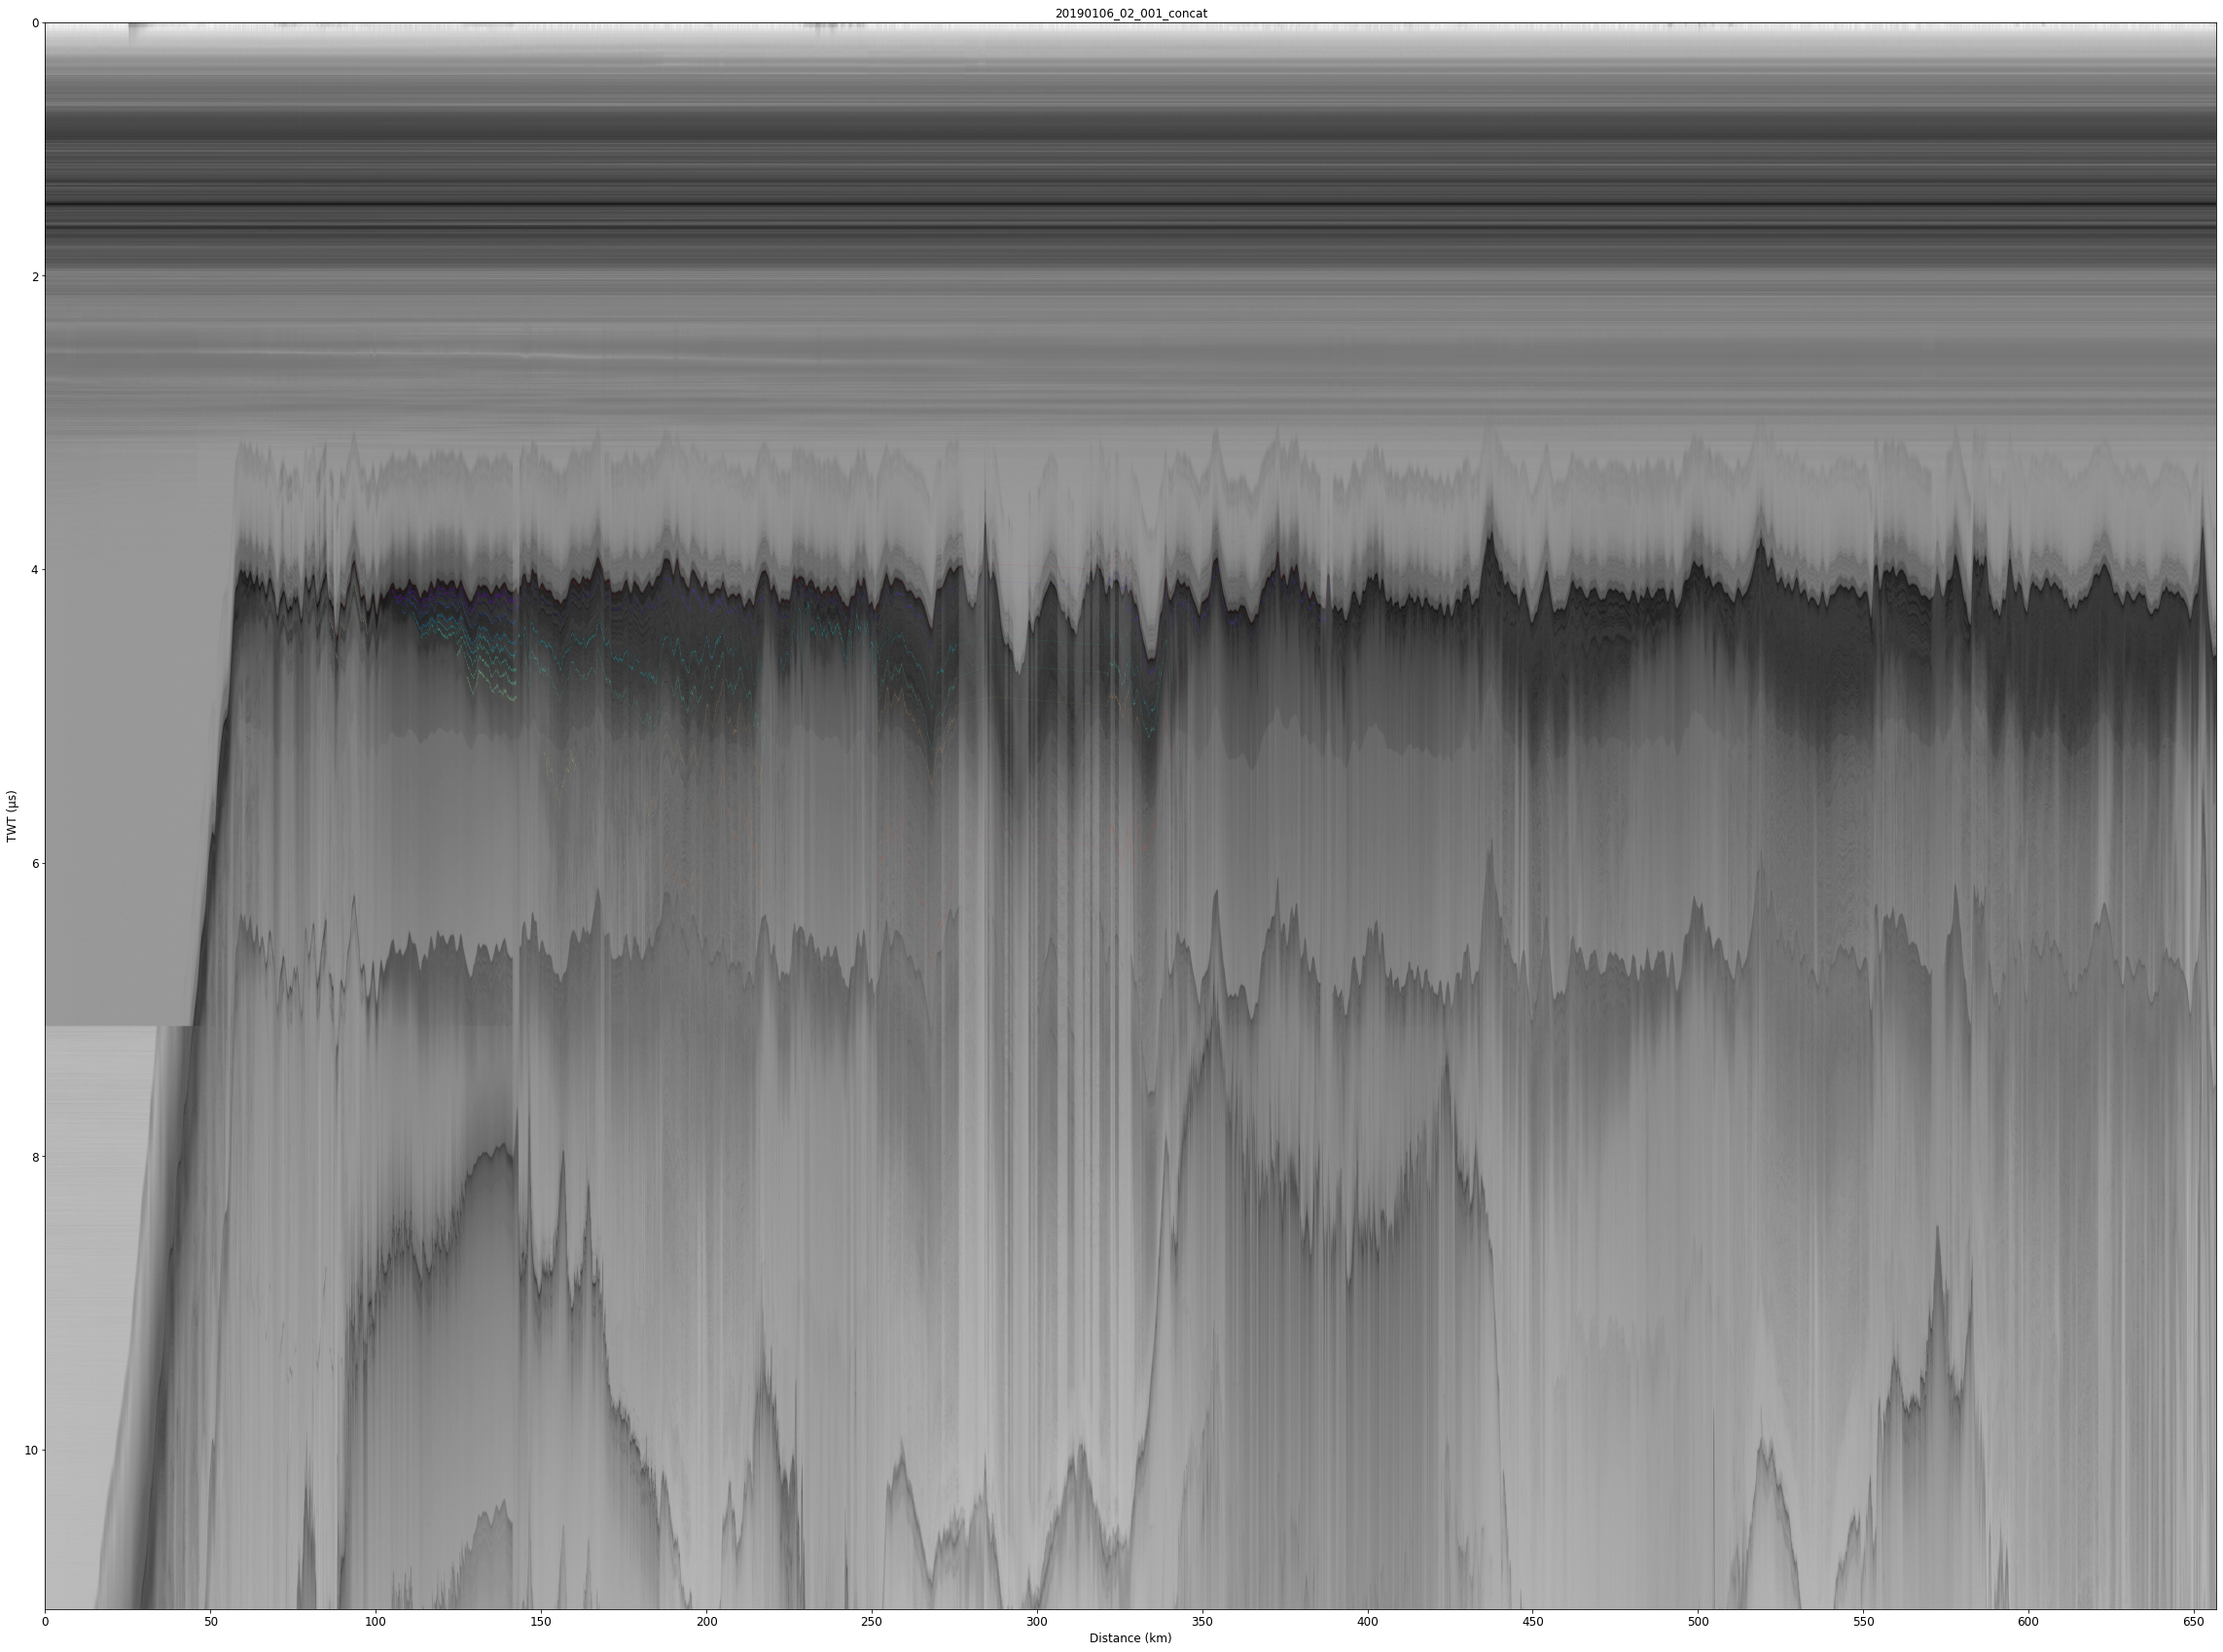

In [1]:
from operator import concat
from Cradar import Cradar
import pandas as pd
import numpy as np
import fiona
import geopandas as gpd
from pathlib import Path
import glob#, os
import matplotlib.pyplot as plt


dir = 'C:/Users/sfranke/Seafile/Orca/Projects/Koch/IRHs_shelf/IRHs_20220729/final/airborne/20190106_02_standard/'
os.chdir(dir)

filelist = []

for matfile in sorted(glob.glob('Data*.mat')):

    crd = Cradar().load_cresis_mat(matfile, dB=False)
    crd.Frame = matfile.split('Data_')[-1].split('.mat')[0]
    crd.to_dB()
    crd.clip_range(start=0, end=4000)
    filelist.append(crd)

crd = Cradar.concat_frames(filelist)

### add layers from pick file ###
#   use closest coordinate

picks = pd.read_csv(Path('C:/Users/sfranke/Seafile/Orca/Projects/Koch/IRHs_shelf/IRHs_20220729/final/airborne/MCoRDS_0602.txt'), skiprows=0, sep=',')
picks = picks.replace('NaN',np.NaN)

irh_list = ['IRH1', 'IRH2', 'IRH3', 'IRH4', 'IRH5', 'IRH6', 'IRH7', 
            'IRH8', 'IRH9', 'IRH10', 'IRH11', 'IRH12', 'IRH13']

# irh_list = ['surface']
factor = 3.465e-6

for irh in irh_list:
    layer_name = str(irh)
    layer_lon  = picks['lon']
    layer_lat  = picks['lat']
    layer_val  = picks[irh] + factor + picks['surface']

    crd.add_layer_by_coords(layer_name, layer_lon, layer_lat, layer_val)
    print('==> added layer: {}'.format(layer_name))

layer_name = 'surface'
layer_lon  = picks['lon']
layer_lat  = picks['lat']
layer_val  = picks['surface'] + factor

crd.add_layer_by_coords(layer_name, layer_lon, layer_lat, layer_val)
print('==> added layer: {}'.format(layer_name))

# for irh in irh_list:
#     traces                      = crd.Layer[irh]['trace']
#     surface_tmp                 = crd.Surface[traces]
#     crd.Layer[irh]['value_twt'] = crd.Layer[irh]['value_twt'] + surface_tmp

crd.get_layer_idx()

# plt.subplots(figsize=(10,6))
# for irh in irh_list:
#     plt.plot(crd.Layer[irh]['trace'], crd.Layer[irh]['value_twt'], label=irh + ' idx')
#     plt.legend()

# plt.subplots(figsize=(10,6))
# for irh in irh_list:
#     plt.plot(crd.Layer[irh]['trace'], crd.Layer[irh]['value_twt_idx'], label=irh)
#     plt.legend()

# # plt.subplots(figsize=(20,12))
# # for irh in irh_list:
# #     plt.scatter(x=crd.Layer[irh]['trace'], y=crd.Layer[irh]['value_twt_idx'], label=irh, s=0.1)
# #     plt.legend()


crd.plot_echogram(figsize_x=40,
                  figsize_y=30,
                  range_mode='twt',
                  every_km_dist=50,
                  every_m_elev=1000,
                  every_twt_ms=2,
                  plot_surface=False,
                  plot_bed=False,
                  plot_layers=True,
                  xlabels_as_int=True,
                  ylabels_as_int=True,
                  fontsize=12,
                  show_figure=True, 
                  show_cbar=False,
                  cmap='binary',
                  save_svg=False, 
                  save_png=True, 
                  suffix='',
                  out_folder='',
                  dpi=400)

In [6]:
crd.Surface

array([1.53876426e-05, 1.53898171e-05, 1.53919905e-05, ...,
       4.59424827e-06, 4.59322057e-06, 4.59214888e-06])

In [2]:
picks['surface']

0        7.513514e-07
1        7.513514e-07
2        7.540541e-07
3        7.540541e-07
4        7.540541e-07
             ...     
42782    6.162162e-07
42783    6.162162e-07
42784    6.162162e-07
42785    6.189189e-07
42786    6.189189e-07
Name: surface, Length: 42787, dtype: float64

In [3]:
crd.Surface

array([1.53876426e-05, 1.53898171e-05, 1.53919905e-05, ...,
       4.59424827e-06, 4.59322057e-06, 4.59214888e-06])

In [11]:
crd.Time

Float64Index([2.7567567567567567e-07,  2.783783783783783e-07,
               2.810810810810809e-07,  2.837837837837835e-07,
               2.864864864864861e-07,  2.891891891891887e-07,
               2.918918918918913e-07,  2.945945945945939e-07,
              2.9729729729729653e-07, 2.9999999999999914e-07,
              ...
               3.668918918918791e-05, 3.6691891891890615e-05,
               3.669459459459332e-05,  3.669729729729602e-05,
              3.6699999999998724e-05,  3.670270270270142e-05,
               3.670540540540413e-05,  3.670810810810683e-05,
               3.671081081080953e-05, 3.6713513513512236e-05],
             dtype='float64', length=13483)

In [12]:
crd.Layer['IRH2']['value_twt']

array([           nan,            nan,            nan, ...,
       9.18918919e-08, 1.02702703e-07, 1.08108108e-07])

In [6]:
picks = pd.read_csv(Path('C:/Users/sfranke/Seafile/Orca/Projects/Koch/IRHs_shelf/IRHs_20220729/final/airborne/MCoRDS_0602.txt'), skiprows=0, sep=',')

irh_list = ['IHR1', 'IHR2', 'IHR3', 'IHR4', 'IHR5', 'IHR6', 'IHR7', 
            'IHR8', 'IHR9', 'IHR10', 'IHR11', 'IHR12', 'IHR13']

for irh in irh_list:
    layer_name = str(irh)
    layer_lon  = picks['lon']
    layer_lat  = picks['lat']
    layer_val  = picks[irh]

    crd.add_layer_by_coords(layer_name, layer_lon, layer_lat, layer_val)
    print('==> added layer: {}'.format(layer_name))

In [20]:
picks

,year_acq,month_acq,day_acq,surveyID,profileID,lon,lat,psX,psY,trace,...,IRH4,IRH5,IRH6,IRH7,IRH8,IRH9,IRH10,IRH11,IRH12,IRH13
0,2019,2,6,2,2,26.255711,-71.060848,918364.340236,1.861791e+06,1,...,NaN,NaN,NaN,NaN,NaN,1.459459e-07,NaN,NaN,NaN,NaN
1,2019,2,6,2,2,26.255746,-71.060796,918368.062922,1.861795e+06,2,...,NaN,NaN,NaN,NaN,NaN,1.540541e-07,NaN,NaN,NaN,NaN
2,2019,2,6,2,2,26.255781,-71.060743,918371.788661,1.861800e+06,3,...,NaN,NaN,NaN,NaN,NaN,1.540541e-07,NaN,NaN,NaN,NaN
3,2019,2,6,2,2,26.255816,-71.060691,918375.518137,1.861805e+06,4,...,NaN,NaN,NaN,NaN,NaN,1.567568e-07,NaN,NaN,NaN,NaN
4,2019,2,6,2,2,26.255851,-71.060638,918379.252995,1.861810e+06,5,...,NaN,NaN,NaN,NaN,NaN,1.594595e-07,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42782,2019,2,6,2,2,20.350991,-70.324733,750548.921420,2.023461e+06,10220,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42783,2019,2,6,2,2,20.351001,-70.324787,750547.207266,2.023455e+06,10221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42784,2019,2,6,2,2,20.351013,-70.324841,750545.515511,2.023450e+06,10222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42785,2019,2,6,2,2,20.351025,-70.324895,750543.848443,2.023444e+06,10223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
crd.Layer['IRH2']['value_twt_corr'] = crd.Layer['IRH2']['value_twt'] + 12

In [18]:
crd.Layer['IRH2']['value_twt_corr']

array([        nan,         nan,         nan, ..., 12.00000011,
       12.0000001 , 12.00000011])

In [79]:
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points

from scipy import spatial



picks = pd.read_csv(Path('C:/Users/sfranke/Seafile/Orca/Projects/Koch/IRHs_shelf/IRHs_20220729/final/airborne/MCoRDS_0602.txt'), skiprows=0, sep=',')

points = []

for i in range(len(crd.Longitude)):
    pt = Point(crd.Longitude[i], crd.Latitude[i])
    points.append(pt)

crd_points = gpd.GeoDataFrame(geometry=points, crs=4326)
crd_points['Longitude'] = pd.DataFrame(crd.Longitude)
crd_points['Latitude']  = pd.DataFrame(crd.Latitude)
crd_points['Trace']     = pd.DataFrame(crd.Trace)


picks = picks[['lon', 'lat', 'IRH2']]#[1000:9000].reset_index(drop=True)

crd_locs    = list(zip(crd.Longitude, crd.Latitude))
tree        = spatial.KDTree(crd_locs)
npt_traces  = []
npt_values  = []
crd_coords  = []
pick_coords = []

for j in range(len(picks)):
    pick_loc    = (picks['lon'][j], picks['lat'][j])
    val        = picks['IRH2'][j]
    npt_trace  = tree.query([pick_loc])[1][0]

    npt_traces.append(npt_trace)
    npt_values.append(val)
    crd_coords.append(str(crd_locs[npt_trace]))
    pick_coords.append(str(pick_loc))

dff                = pd.DataFrame(np.array(npt_traces))
dff['vals']        = pd.DataFrame(np.array(npt_values))
dff['crd_coords']  = pd.DataFrame(np.array(crd_coords))
dff['pick_coords'] = pd.DataFrame(np.array(pick_coords))

dff.columns = ['traces', 'values', 'crd_coords', 'pick_coords']
dff

# airports = [(10,10),(20,20),(30,30),(40,40)]
# tree = spatial.KDTree(airports)
# tree.query([(21,21)])

# (array([ 1.41421356]), array([1]))


# npt_traces = []
# npt_values = []

# for j in range(len(picks)):

#     loc = Point(picks['lon'][j], picks['lat'][j])
#     val = picks['IRH9'][j]

#     npt       = nearest_points(loc, MultiPoint(crd_points.geometry.values))[1]
#     npt_row   = crd_points.loc[crd_points.geometry == npt]
#     npt_trace = npt_row['Trace'].values[0]

#     npt_traces.append(npt_trace)
#     npt_values.append(val)

# dff         = pd.DataFrame(np.array(npt_traces))
# dff['vals'] = pd.DataFrame(np.array(npt_values))
# dff.columns = ['traces', 'values']
# dff

,traces,values,crd_coords,pick_coords
0,14427,NaN,"(26.255711493821643, -71.06084839701283)","(26.2557114938216, -71.0608483970128)"
1,14428,NaN,"(26.255746209939083, -71.06079582109108)","(26.2557462099391, -71.0607958210911)"
2,14429,NaN,"(26.255781030192708, -71.06074325196835)","(26.2557810301927, -71.0607432519683)"
3,14430,NaN,"(26.255815978141573, -71.06069069135742)","(26.2558159781416, -71.0606906913574)"
4,14431,NaN,"(26.255851111209985, -71.06063814369928)","(26.25585111121, -71.0606381436993)"
...,...,...,...,...
42782,64846,9.729730e-08,"(20.35099052591586, -70.32473341206487)","(20.3509905259159, -70.3247334120649)"
42783,64847,1.027027e-07,"(20.351001339832234, -70.32478732678084)","(20.3510013398322, -70.3247873267808)"
42784,64848,1.054054e-07,"(20.35101274312332, -70.32484120068935)","(20.3510127431233, -70.3248412006893)"
42785,64849,1.027027e-07,"(20.351024798308337, -70.32489503171949)","(20.3510247983083, -70.3248950317195)"


In [86]:
crd.Frame.new = 'xx'

AttributeError: 'str' object has no attribute 'new'

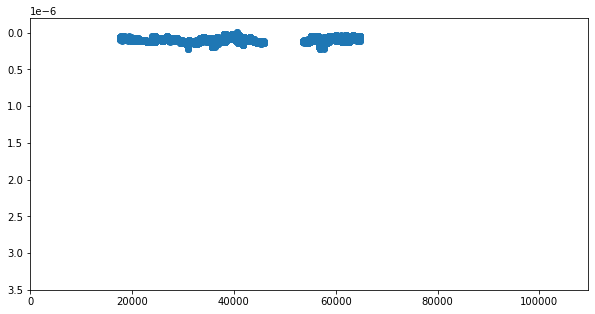

In [84]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(10,5))
#plt.plot(dff['values'])
plt.scatter(x=dff['traces'], y=dff['values'])

plt.xlim(0, len(crd.Longitude))
plt.ylim(-0.2e-6, 3.5e-6)
ax = plt.gca()
ax.invert_yaxis()

In [1]:
from Cradar import Cradar

crd = Cradar()
crd

NameError: name 'Cradar' is not defined

In [18]:
npt      = nearest_points(loc, MultiPoint(crd_points.geometry.values))

<GeometryArray>
 ...
Length: 9562, dtype: geometry

In [13]:
picks = picks[['lon', 'lat', 'IRH9']]

loc1 = Point(picks['lon'][1000], picks['lat'][1000])
val1 = picks['IRH9'][1000]

np     = nearest_points(intersec_coords[i], frame2_points)[1]
np_row = gdf_point.loc[gdf_point.geometry == np_frame2]

1.56756756756751e-07